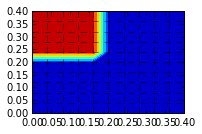

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

###########################
## Set Initial Condition ##
##
# dimensions in x, y and z directions (dx, dy, dz),
dx = 0.4
dy = 0.4
dz = 0.01 # plate thickness (m.)

# number of divisions in each direction (nx, ny)
nx = 11
ny = 11

# the cell dimensions (cx, cy)
cx = dx/nx
cy = dy/ny

# The north boundary is maintained at a temperature of 100°C
tInitN = 100 

# The west boundary receives a steady heat flux of 500 kW/m^2
hFluxW = 500 

# The thermal conductivity of plate material are k1 = 1000 W/m.K. , k2 = 2000 W/m.K. 
k = np.zeros((ny, nx)) 
k[:,:]=1000
k[ny-5:ny,0:5]=2000

##################
## Create node ##
##
u = np.zeros((ny, nx)) 
un = np.zeros((ny, nx)) 
            
x = np.linspace(0, dx, nx)       ## Line space from 0 to dx split in nx spaces.
y = np.linspace(0, dy, ny)
X,Y = np.meshgrid(x,y)

####################################
## Plot the plate material layout ##
##
plt.subplot(221)
plt.contourf(X,Y, k[:])
plt.plot(X,Y, 'k--', alpha=0.5)
plt.plot(X.T,Y.T, 'k--', alpha=0.5)
plt.show()


In [2]:
def sFVM2DSteady(ns):
    u = np.zeros((ny, nx))
    
    for s in range(ns):
        un=u.copy()

        for j in range(ny):
            for i in range(nx):

                ### Check  Condition 
                # Cell(0,0) buttom-left conner
                if  (j == 0) & (i == 0):
                    aW = 0 # (k[j,i-1]/cx)*(cy*dz)
                    aE = (k[j,i+1]/cx)*(cy*dz)
                    aS = 0 #(k[j-1,i]/cx)*(cy*dz)
                    aN = (k[j+1,i]/cx)*(cy*dz)
                    bW = hFluxW*1000*(cy*dz)
                    bS = 0
                    sP = 0
                    
                    sU = bW + bS
                    aP = aW+ aE + aS + aN - sP
                    
                    u[j,i] =  (aN*(un[j,i+1]+un[j+1,i])+sU)/(aP) 

                # Cell(ny,0) top-left conner
                if  (j == ny-1) & (i == 0):
                    aW = 0 # (k[j,i-1]/cx)*(cy*dz)
                    aE = (k[j,i+1]/cx)*(cy*dz)
                    aS = (k[j-1,i]/cx)*(cy*dz)
                    aN = 0 #(k[j+1,i]/cx)*(cy*dz)
                    
                    bW = hFluxW*1000*(cy*dz)
                    bN = 2*(k[j,i]/cy)*(cx*dz)*tInitN
                    sP = -(2*(k[j,i]/cy)*(cx*dz))

                    sU = bW + bN
                    aP = aW+ aE + aS + aN - sP
                    
                    u[j,i] = (aS*(un[j,i+1]+un[j-1,i])+sU)/(aP)

                # Cell(0,nx) buttom-right conner
                if  (j == 0) & (i == nx-1):
                    aW = (k[j,i-1]/cx)*(cy*dz)
                    aE = 0 #(k[j,i+1]/cx)*(cy*dz)
                    aS = 0 #(k[j-1,i]/cx)*(cy*dz)
                    aN = (k[j+1,i]/cx)*(cy*dz)
                    
                    aP = aW + aE + aS + aN
                    
                    u[j,i] = (aW*(un[j,i-1]+un[j+1,i]))/(aP)

                # Cell(ny,nx) Top-right conner
                if  (j == nx-1) & (i == nx-1):
                    aW = (k[j,i-1]/cx)*(cy*dz)
                    aE = 0 #(k[j,i+1]/cx)*(cy*dz)
                    aS = (k[j-1,i]/cx)*(cy*dz)
                    aN = 0 #(k[j+1,i]/cx)*(cy*dz)
                    
                    bN = 2*(k[j,i]/cx)*(cy*dz)*tInitN
                    bE = 0
                    sP = -(2*(k[j,i]/cy)*(cx*dz))
                    
                    sU = bE + bN
                    aP = aW + aE + aS + aN - sP
                    
                    u[j,i] = (aW*(un[j,i-1]+un[j-1,i])+sU)/(aP)

                # First colum at W 
                if (0 < j < ny-1) & (i == 0):
                    aW = 0# (k[j,i-1]/cx)*(cy*dz)
                    aE = (k[j,i+1]/cx)*(cy*dz)
                    aS = (k[j-1,i]/cx)*(cy*dz)
                    aN = (k[j+1,i]/cx)*(cy*dz)
                    
                    bW = hFluxW*1000*(cy*dz)
                    bS  = 0
                    
                    sU = bW + bS
                    aP = aW + aE + aS + aN
                    
                    u[j,i] =  (aE*(un[j,i+1]+un[j+1,i]+un[j-1,i])+sU)/(aP)

                # Under row at S
                if (j == 0) & (0 < i  < nx-1):
                    aW = (k[j,i-1]/cx)*(cy*dz)
                    aE = (k[j,i+1]/cx)*(cy*dz)
                    aS = 0 #(k[j-1,i]/cx)*(cy*dz)
                    aN = (k[j+1,i]/cx)*(cy*dz)
                    
                    aP = aW + aE + aS + aN
                    u[j,i] = (aN*(un[j,i+1]+un[j+1,i]+un[j,i-1]))/(aP)  

                # Top row at N
                if (j == ny-1) & (0 < i  < nx-1):
                    aW = (k[j,i-1]/cx)*(cy*dz)
                    aE = (k[j,i+1]/cx)*(cy*dz)
                    aS = (k[j-1,i]/cx)*(cy*dz)
                    aN = 0 #(k[j+1,i]/cx)*(cy*dz)
                    
                    bN = 2*(k[j,i]/cx)*(cy*dz)*tInitN
                    sP = -(2*(k[j,i]/cy)*(cx*dz))
                    
                    sU = bN
                    aP = aW + aE + aS + aN - sP
                    
                    u[j,i] = (aS*(un[j-1,0]+un[j,i+1]+un[j,i-1])+sU)/(aP)

                # Center
                if (0< j < ny-1) & (0< i < nx-1):
                    aW = (k[j,i-1]/cx)*(cy*dz)
                    aE = (k[j,i+1]/cx)*(cy*dz)
                    aS = (k[j-1,i]/cx)*(cy*dz)
                    aN = (k[j+1,i]/cx)*(cy*dz)
                    
                    aP = aW + aE + aS + aN
                    
                    u[j,i] = (aE*(un[j,i+1]+un[j,i-1]+un[j+1,i]+un[j-1,i]))/(aP)

                # Last colum at E
                if (0 < j < ny-1) & (i == nx-1):
                    aW = (k[j,i-1]/cx)*(cy*dz)
                    aE = 0 #(k[j,i+1]/cx)*(cy*dz)
                    aS = (k[j-1,i]/cx)*(cy*dz)
                    aN = (k[j+1,i]/cx)*(cy*dz)
                    
                    aP = aW + aE + aS + aN
                    
                    u[j,i] = (aS*(un[j,i-1]+un[j+1,i]+un[j-1,i]))/(aP)
                    
    ## Plot data
    plt.subplot(222)
    plt.contourf(X,Y, u[:])
    plt.plot(X,Y, 'k--', alpha=0.5)
    plt.plot(X.T,Y.T, 'k--', alpha=0.5)
    plt.colorbar()
    plt.show()
    
    np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
    print(u)

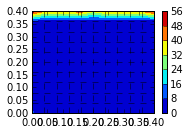

[[ 9.09  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 6.06  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 6.06  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 6.06  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 6.06  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 4.55  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 3.64  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 3.03  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 3.03  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 3.03  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 52.27  40.00  40.00  40.00  44.44  33.33  40.00  40.00  40.00  40.00
   50.00]]


In [3]:
sFVM2DSteady(1)

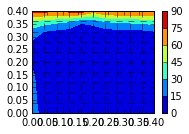

[[ 21.25  8.51  2.90  0.58  0.11  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 19.42  7.74  2.07  0.44  0.02  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 18.86  6.92  1.93  0.30  0.02  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 17.90  6.64  1.74  0.30  0.02  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 16.25  5.78  1.52  0.26  0.02  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 11.61  3.80  0.92  0.14  0.01  0.00  0.00  0.00  0.00  0.00  0.00]
 [ 13.50  5.18  1.56  0.43  0.04  0.05  0.16  0.16  0.16  0.16  0.62]
 [ 13.38  6.35  2.87  1.73  0.44  0.80  1.59  1.82  1.82  2.46  3.08]
 [ 22.82  14.21  11.12  8.64  3.41  5.05  8.71  9.67  10.40  10.86  13.70]
 [ 44.19  37.61  33.78  30.57  17.61  20.87  29.97  32.73  33.37  34.98
   36.50]
 [ 80.45  77.72  77.32  78.10  83.10  64.65  74.48  76.40  76.86  76.86
   76.25]]


In [4]:
sFVM2DSteady(5)

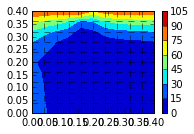

[[ 30.37  16.79  8.03  3.51  1.24  0.41  0.09  0.02  0.00  0.00  0.00]
 [ 29.29  15.48  7.40  2.93  1.05  0.28  0.07  0.01  0.00  0.00  0.00]
 [ 27.85  14.69  6.64  2.67  0.85  0.24  0.05  0.01  0.00  0.01  0.01]
 [ 26.35  13.38  6.07  2.31  0.76  0.20  0.07  0.04  0.05  0.06  0.12]
 [ 23.36  11.66  5.13  2.01  0.65  0.25  0.19  0.23  0.25  0.36  0.47]
 [ 18.06  8.87  4.27  1.84  0.61  0.51  0.80  1.00  1.22  1.38  1.89]
 [ 26.59  16.57  9.54  5.12  1.26  1.38  2.77  3.65  4.06  4.76  5.41]
 [ 30.31  20.94  14.79  9.29  2.79  4.16  8.27  10.29  11.57  12.32  13.91]
 [ 42.41  34.25  27.75  20.75  7.87  11.59  20.47  24.64  26.32  27.80
   29.03]
 [ 63.43  56.53  51.82  44.45  24.30  29.54  44.15  49.40  51.47  52.22
   53.20]
 [ 88.80  86.72  86.49  87.52  92.96  72.41  83.26  85.49  85.88  85.63
   83.80]]


In [5]:
sFVM2DSteady(10)

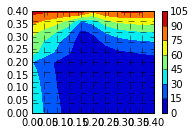

[[ 43.14  28.43  17.54  10.31  5.59  2.92  1.40  0.69  0.35  0.26  0.25]
 [ 42.03  27.19  16.75  9.57  5.23  2.64  1.34  0.69  0.45  0.38  0.44]
 [ 40.36  26.01  15.69  9.02  4.82  2.57  1.41  0.97  0.81  0.87  0.97]
 [ 38.40  24.29  14.74  8.36  4.62  2.64  1.90  1.68  1.79  1.95  2.27]
 [ 35.20  22.35  13.61  7.94  4.39  3.13  3.00  3.39  3.80  4.33  4.77]
 [ 30.07  19.81  12.99  7.68  3.88  3.94  5.33  6.65  7.82  8.63  9.51]
 [ 50.80  38.79  27.42  16.63  4.99  5.16  9.54  12.71  14.69  16.19  17.18]
 [ 54.25  43.49  33.09  21.21  6.45  8.88  17.47  22.76  25.96  27.72
   29.12]
 [ 64.27  55.00  45.26  32.48  11.82  17.07  31.07  38.65  42.39  44.40
   45.42]
 [ 79.23  72.16  65.41  54.48  28.52  35.10  53.76  61.53  64.79  65.93
   66.12]
 [ 94.96  93.03  92.86  93.99  99.80  77.75  89.38  91.78  92.17  91.74
   89.15]]


In [6]:
sFVM2DSteady(20)